In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Давайте проверим уровень знаний на одномерных данных

In [72]:
X1 , y1 = make_regression(n_samples = 10000 , n_features = 1 , noise = 5)

In [80]:
X_train1 , X_test1 , y_train1 , y_test1 = train_test_split(X1 , y1)

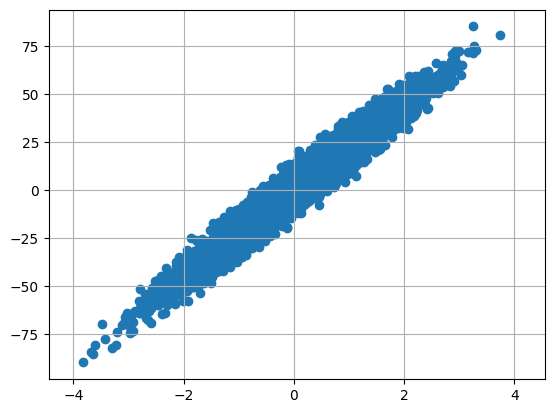

In [81]:
plt.scatter(X1,y1)
plt.grid()
plt.xlim([np.min(X) , np.max(X)])

plt.show()

In [82]:
model = keras.models.Sequential([
    keras.layers.Dense(1,input_shape = (1,))
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
linear_model = LinearRegression()

In [84]:
print(model.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

None


Тренеруем данные

In [85]:
model.compile(loss = keras.losses.MeanSquaredError() , optimizer = keras.optimizers.SGD() , metrics = ["mean_squared_error"])

In [86]:
hist = model.fit(X_train1,y_train1,epochs = 5 , verbose = 2 , batch_size = 16 , validation_data = (X_test1,y_test1))

Epoch 1/5
469/469 - 1s - 3ms/step - loss: 52.3103 - mean_squared_error: 52.3103 - val_loss: 23.8040 - val_mean_squared_error: 23.8040
Epoch 2/5
469/469 - 1s - 3ms/step - loss: 24.7512 - mean_squared_error: 24.7512 - val_loss: 23.7515 - val_mean_squared_error: 23.7515
Epoch 3/5
469/469 - 1s - 3ms/step - loss: 24.7613 - mean_squared_error: 24.7613 - val_loss: 23.7618 - val_mean_squared_error: 23.7618
Epoch 4/5
469/469 - 2s - 4ms/step - loss: 24.7620 - mean_squared_error: 24.7620 - val_loss: 23.8001 - val_mean_squared_error: 23.8001
Epoch 5/5
469/469 - 3s - 5ms/step - loss: 24.7481 - mean_squared_error: 24.7481 - val_loss: 23.7452 - val_mean_squared_error: 23.7452


In [87]:
linear_model.fit(X_train1,y_train1)

LinearRegression()

In [88]:
from sklearn.metrics import r2_score , mean_squared_error

In [93]:
predictions_train1_neural = model.predict(X_train1)
predictions_test1_neural = model.predict(X_test1)
linear_predictions_train1 = linear_model.predict(X_train1)
linear_predictions_test1 = linear_model.predict(X_test1)
print(f"neural LinearModel train r2_score {r2_score(y_train1,predictions_train1_neural)}")
print(f"neural LinearModel test r2_score {r2_score(y_train1,predictions_train1_neural)}")

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
neural LinearModel train r2_score 0.9520700292143136
neural LinearModel test r2_score 0.9520700292143136


In [94]:
print(f"neural LinearModel train r2_score {r2_score(y_train1,predictions_train1_neural)}")
print(f"neural LinearModel test r2_score {r2_score(y_train1,predictions_train1_neural)}")
print(f"LinearModel train r2_score {r2_score(y_train1,linear_predictions_train1)}")
print(f"LinearModel test r2_score {r2_score(y_test1,linear_predictions_test1)}")

neural LinearModel train r2_score 0.9520700292143136
neural LinearModel test r2_score 0.9520700292143136
LinearModel train r2_score 0.9521052741136545
LinearModel test r2_score 0.953254744392626


In [95]:
weights , biases = model.get_weights()
print(f"neural Linear weights : {weights}")
print(f"neural Linear biases : {biases}")

neural Linear weights : [[22.357138]]
neural Linear biases : [0.01160756]


In [96]:
linear_weights , linear_biases = linear_model.coef_ , linear_model.intercept_
print(f"Linear weights : {linear_weights}")
print(f"Linear biases : {linear_biases}")

Linear weights : [22.46417688]
Linear biases : -0.07298622072420784


# Данные у которых 20 features

In [97]:
X , y = make_regression(n_samples = 10000 , n_features = 20 , noise = 5)

In [98]:
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 0.2)

In [57]:
model2 = keras.models.Sequential([
    keras.layers.Dense(1,)
])

In [58]:
linear_model2 = LinearRegression()

In [59]:
model2.compile(loss = keras.losses.MeanSquaredError() , optimizer = keras.optimizers.SGD() , metrics = ["mean_squared_error"])

Тренеруем данные

In [60]:
hist = model2.fit(X_train,y_train , verbose = 2 , epochs = 5 , validation_data = ([X_test , y_test]) , batch_size = 64)

Epoch 1/5
125/125 - 1s - 6ms/step - loss: 5036.6265 - mean_squared_error: 5036.6265 - val_loss: 198.0325 - val_mean_squared_error: 198.0325
Epoch 2/5
125/125 - 0s - 3ms/step - loss: 57.8028 - mean_squared_error: 57.8028 - val_loss: 25.9636 - val_mean_squared_error: 25.9636
Epoch 3/5
125/125 - 1s - 5ms/step - loss: 24.9438 - mean_squared_error: 24.9438 - val_loss: 24.5885 - val_mean_squared_error: 24.5885
Epoch 4/5
125/125 - 1s - 5ms/step - loss: 24.7122 - mean_squared_error: 24.7122 - val_loss: 24.5207 - val_mean_squared_error: 24.5207
Epoch 5/5
125/125 - 1s - 4ms/step - loss: 24.7016 - mean_squared_error: 24.7016 - val_loss: 24.4745 - val_mean_squared_error: 24.4745


In [61]:
linear_model2.fit(X_train , y_train)

LinearRegression()

Тестируем

In [62]:
predictions_train_neural = model2.predict(X_train)
predictions_test_neural = model2.predict(X_test)
predictions_train_linear = linear_model2.predict(X_train)
predictions_test_linear = linear_model2.predict(X_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [64]:
print(f"neural linear model train mean_squared error {mean_squared_error(predictions_train_neural , y_train)}")
print(f"neural linear model test mean_squared error {mean_squared_error(predictions_test_neural , y_test)}")
print(f"linear model train mean_squared error {mean_squared_error(predictions_train_linear , y_train)}")
print(f"linear model test mean_squared error {mean_squared_error(predictions_test_linear , y_test)}")

neural linear model train mean_squared error 24.60637656559622
neural linear model test mean_squared error 24.474473528410176
linear model train mean_squared error 24.58233105997758
linear model test mean_squared error 24.485758600570517


In [69]:
weights_neural , bias_neural = model2.get_weights()
weights_linear , bias_linear = linear_model2.coef_ , linear_model.intercept_

In [70]:
print(f"weights neural linear model : {weights_neural}")
print(f"weights linear model : {weights_linear}")

weights neural linear model : [[-8.0120973e-02]
 [-5.8107846e-03]
 [ 3.2742111e+01]
 [-9.3196668e-02]
 [ 8.9291405e+01]
 [-2.1270363e-01]
 [ 4.3996166e+01]
 [ 2.9325939e+01]
 [ 8.1153907e-02]
 [ 2.2312021e-03]
 [-3.4113083e-02]
 [ 4.6723016e-02]
 [ 8.3329437e+01]
 [ 2.6692030e+01]
 [ 9.6464502e-03]
 [ 6.4178286e-03]
 [ 4.3585777e+01]
 [ 1.4881352e+01]
 [ 4.7144344e+01]
 [ 3.0791632e+01]]
weights linear model : [-1.30222548e-01 -3.06458626e-02  3.27489033e+01 -1.00950359e-01
  8.93142385e+01 -1.32031868e-01  4.40088814e+01  2.92958132e+01
  4.70110412e-02  2.47192093e-02 -3.15134185e-02 -6.93178325e-03
  8.33078432e+01  2.67120979e+01  1.72444655e-02 -4.92451638e-02
  4.35980432e+01  1.48915468e+01  4.71244059e+01  3.08108936e+01]


In [71]:
print(f"bias for neural linear model : {bias_neural}")
print(f"bias for linear model : {bias_linear}")

bias for neural linear model : [-0.06698061]
bias for linear model : 0.012344194235605233


# **Заключение**

Основное отличие между линейной регрессией в Keras и Scikit-learn заключается в том, что Keras обычно используется для более сложных моделей с нейронными сетями и предоставляет более гибкую настройку, позволяя добавлять различные слои и параметры. В то время как линейная регрессия в Scikit-learn — это более простая и специализированная реализация для задачи регрессии, с готовыми методами для обучения и прогнозирования. Keras дает больше контроля над архитектурой модели, но для базовой линейной регрессии Scikit-learn будет проще и быстрее.